In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [2]:
import os
lst = os.listdir('./new_extracted_data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./new_extracted_data/' + file))

In [3]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data['section_rel'] = all_data['section_count_after'] / all_data['section_count_before']
all_data

,section_count_before,section_count_after,angle_max,section_max_value,section_average_value,section_median_value,square,time,time_median,time_average,condition,section_rel
0,64,29,94.278497,242.266382,30.784024,23.000000,76.305433,3625.5837,24.57230,125.020128,0,0.453125
1,115,26,87.299621,304.867184,67.287430,58.395229,82.656427,2182.8154,35.49835,83.954438,0,0.226087
2,54,5,13.045637,678.098813,173.807795,16.124515,2.738570,925.0443,195.97610,185.008860,0,0.092593
3,29,10,65.119633,216.621790,33.723046,10.908327,17.159112,4606.5068,103.53395,460.650680,0,0.344828
4,73,18,124.777831,252.049598,48.999108,20.419638,16.001493,5615.9501,108.01160,311.997228,0,0.246575
...,...,...,...,...,...,...,...,...,...,...,...,...
1898,78,23,126.682351,411.409771,50.559894,21.023796,131.922880,16116.3502,55.80270,700.710878,0,0.294872
1899,37,12,18.572979,92.417531,39.264778,36.474342,50.739683,398.0207,24.50505,33.168392,0,0.324324
1900,37,6,145.234803,286.000000,89.861356,51.733266,8.377555,10563.8894,100.17850,1760.648233,0,0.162162
1901,58,25,102.131321,230.217289,31.996645,14.317821,63.254180,890.9039,19.99640,35.636156,0,0.431034


In [4]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
n_samples

881

In [5]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -2] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -2] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [6]:
len(all_data[all_data.condition == 0])

881

In [7]:
len(all_data[all_data.condition == 1])

881

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 1758 to 696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   section_count_before   1762 non-null   int64  
 1   section_count_after    1762 non-null   int64  
 2   angle_max              1762 non-null   float64
 3   section_max_value      1762 non-null   float64
 4   section_average_value  1762 non-null   float64
 5   section_median_value   1762 non-null   float64
 6   square                 1762 non-null   float64
 7   time                   1762 non-null   float64
 8   time_median            1762 non-null   float64
 9   time_average           1762 non-null   float64
 10  condition              1762 non-null   int64  
 11  section_rel            1762 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 179.0 KB


In [9]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   section_count_before   0 non-null      int64  
 1   section_count_after    0 non-null      int64  
 2   angle_max              0 non-null      float64
 3   section_max_value      0 non-null      float64
 4   section_average_value  0 non-null      float64
 5   section_median_value   0 non-null      float64
 6   square                 0 non-null      float64
 7   time                   0 non-null      float64
 8   time_median            0 non-null      float64
 9   time_average           0 non-null      float64
 10  condition              0 non-null      int64  
 11  section_rel            0 non-null      float64
dtypes: float64(9), int64(3)
memory usage: 0.0 bytes


In [10]:
all_data.drop_duplicates(keep='first', inplace = True)

In [11]:
def print_hist_boxplot_heatmap(data):
    data.hist(figsize = (25, 25), grid = True)
    for el in data:
        sns.boxplot(x=data[el])
        plt.show()
    plt.figure(figsize=(10, 6))
    sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

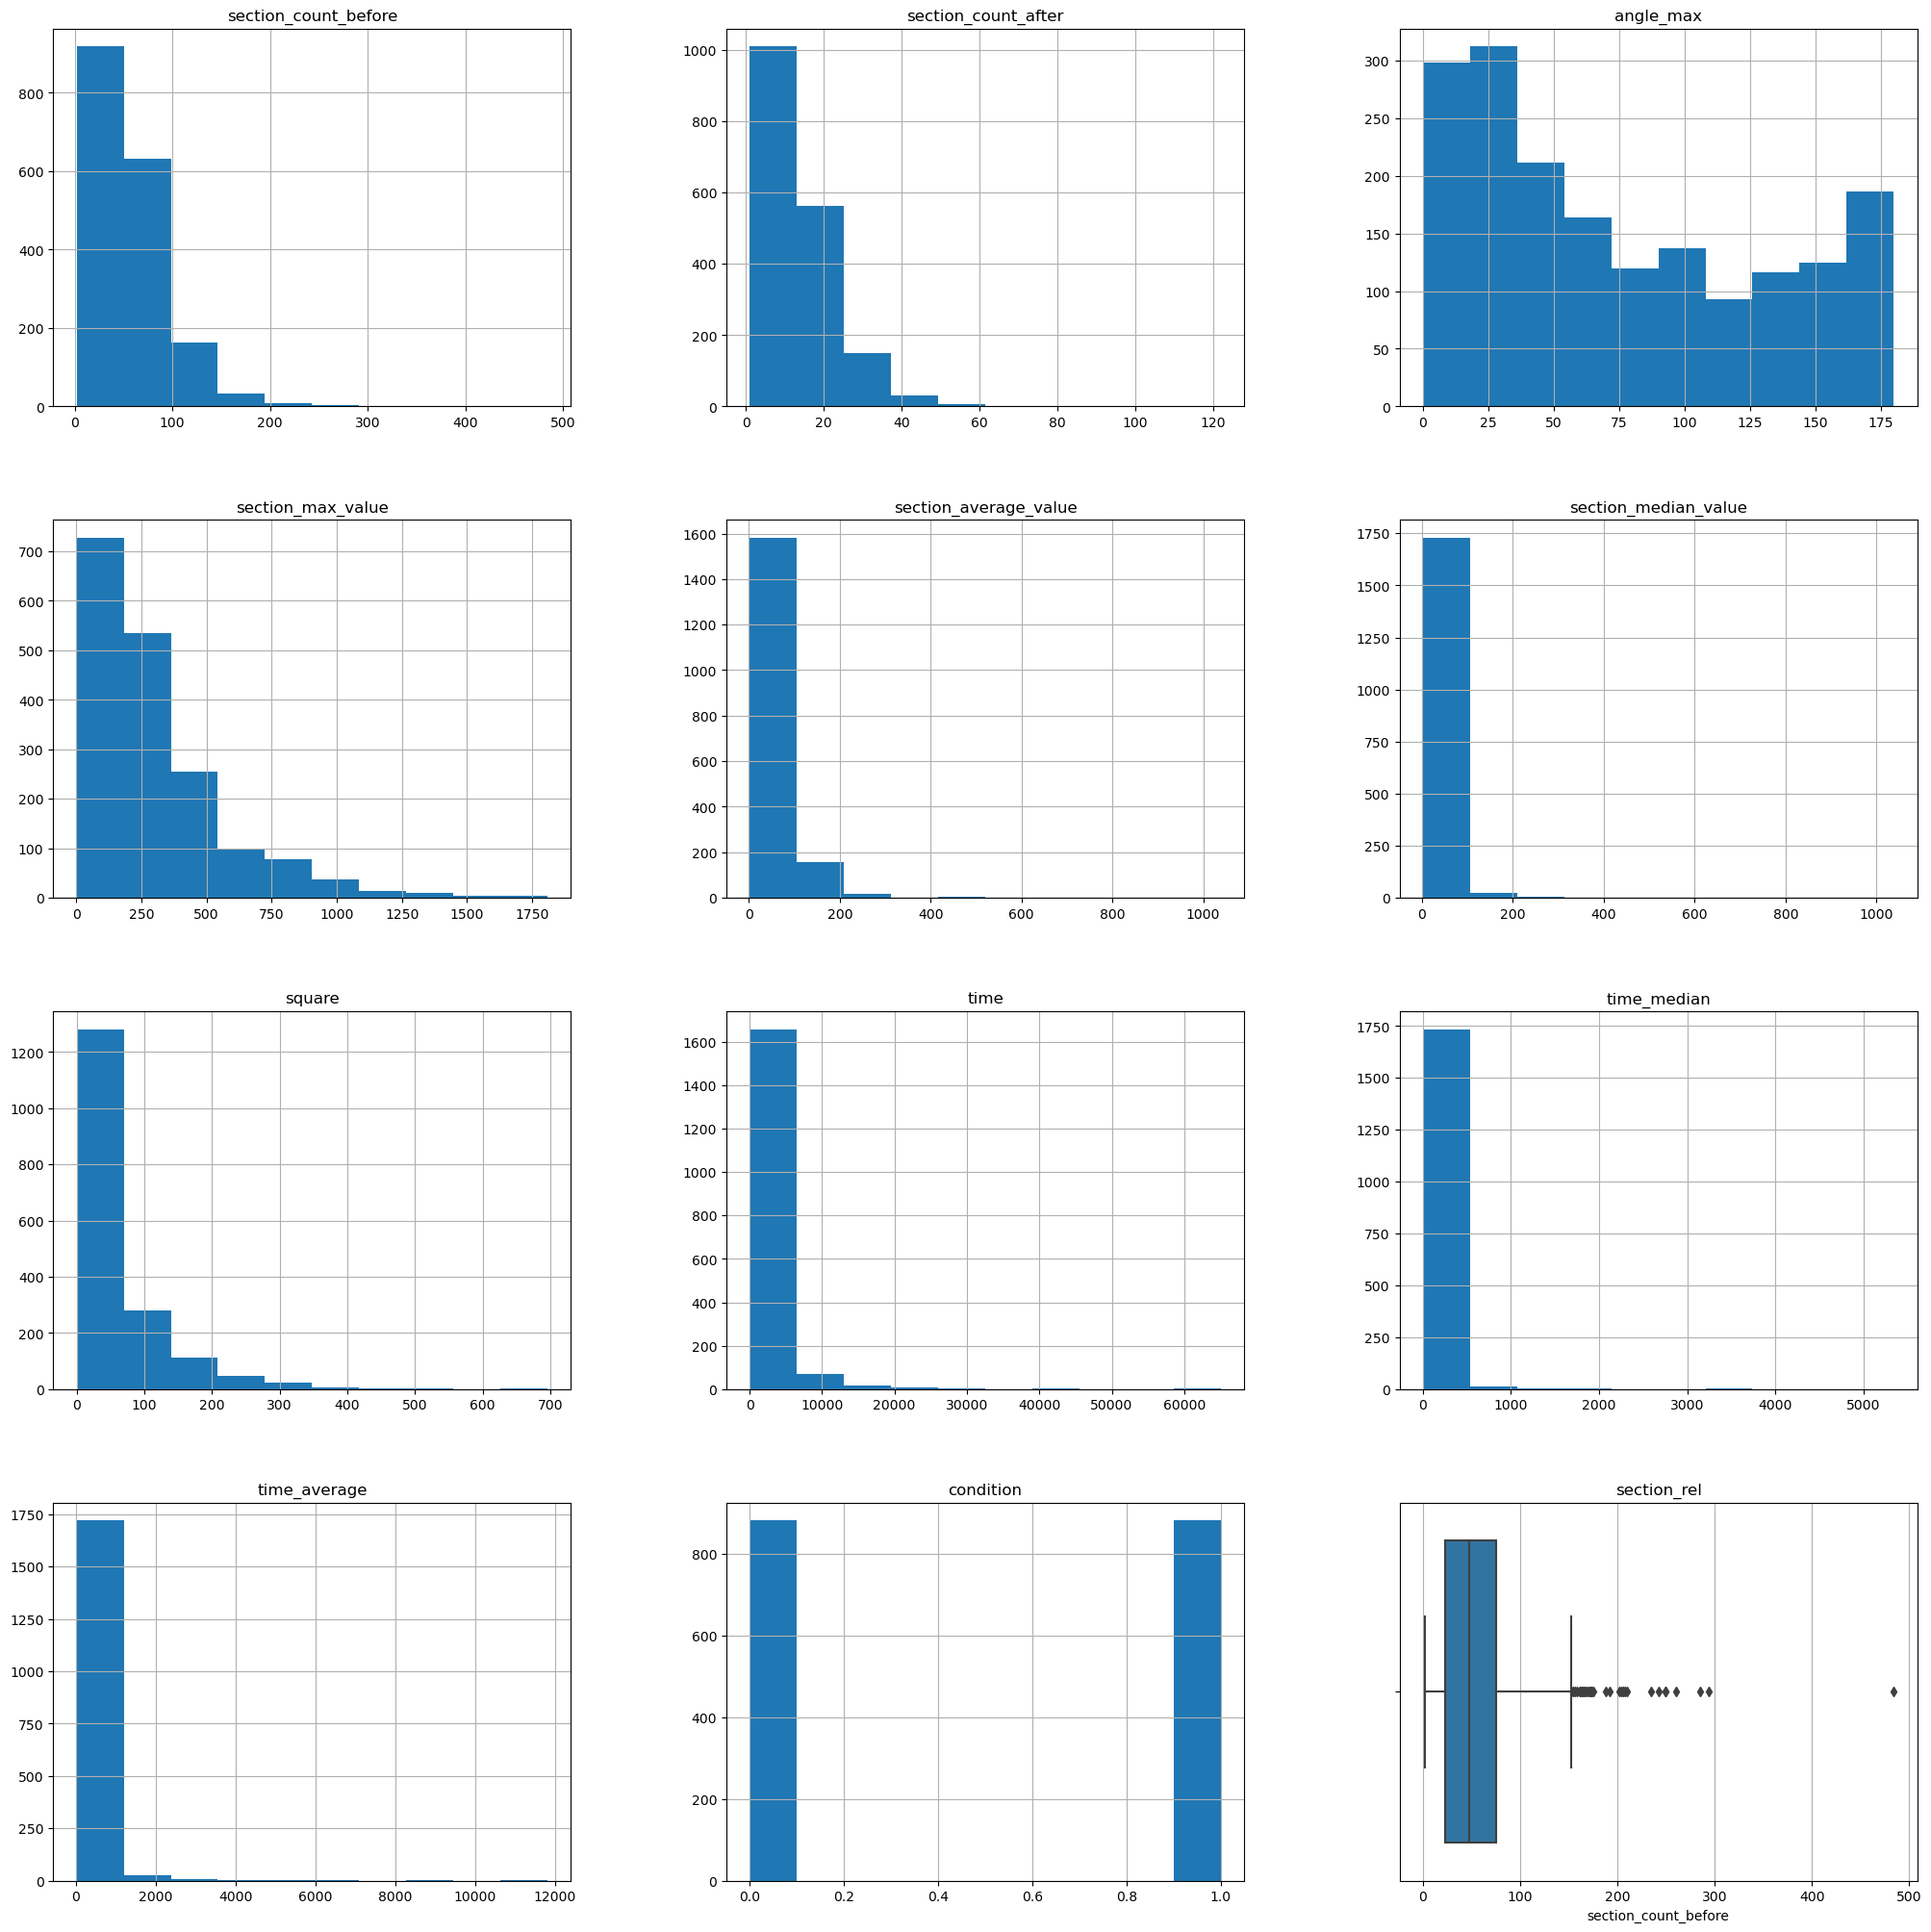

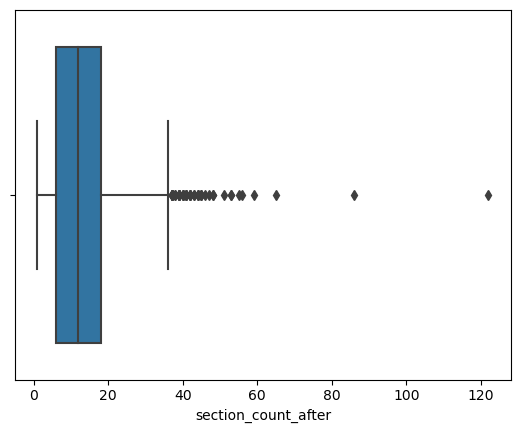

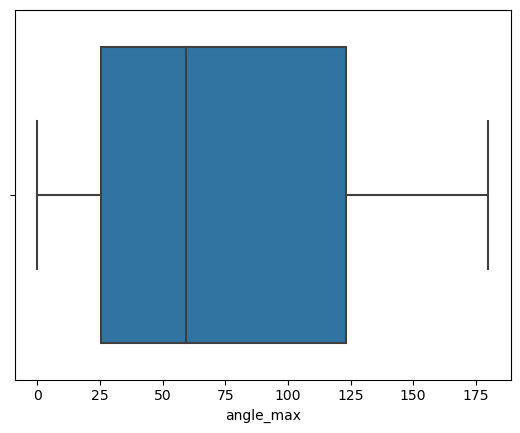

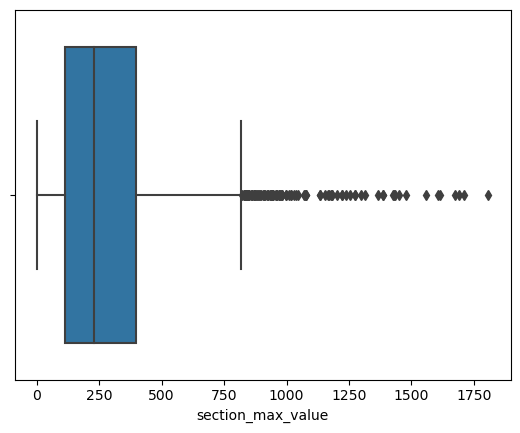

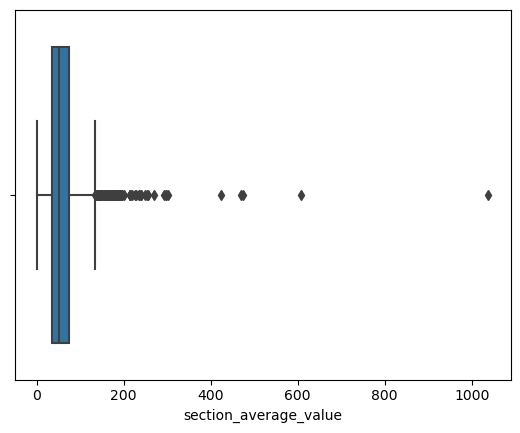

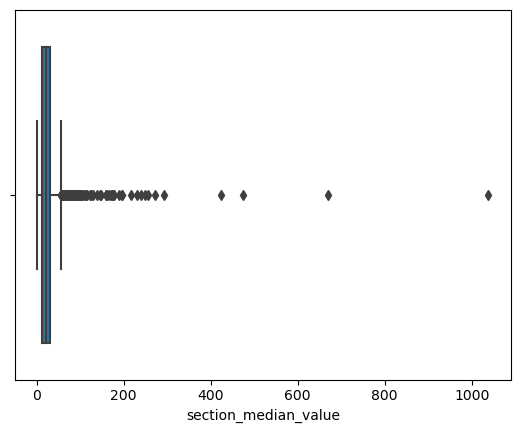

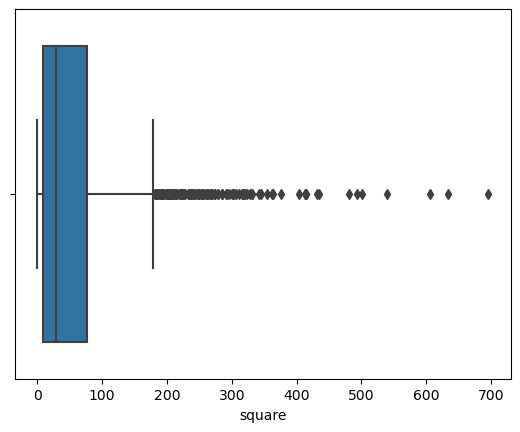

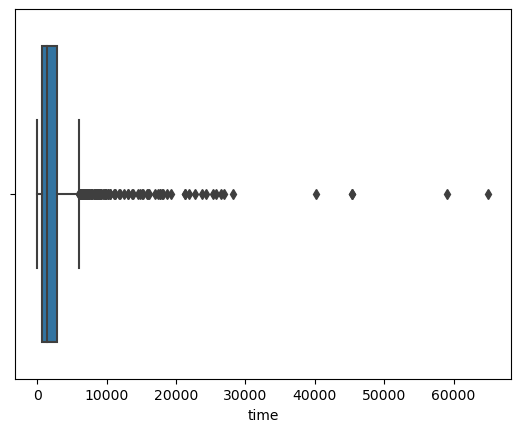

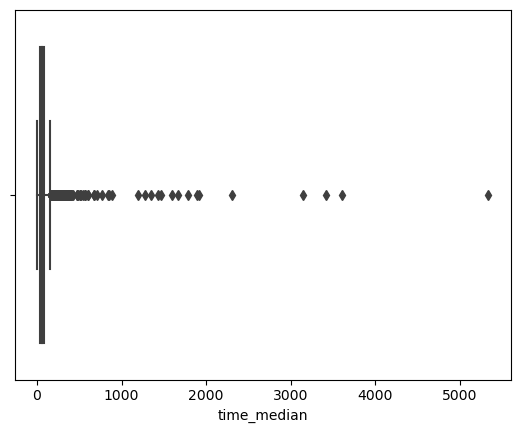

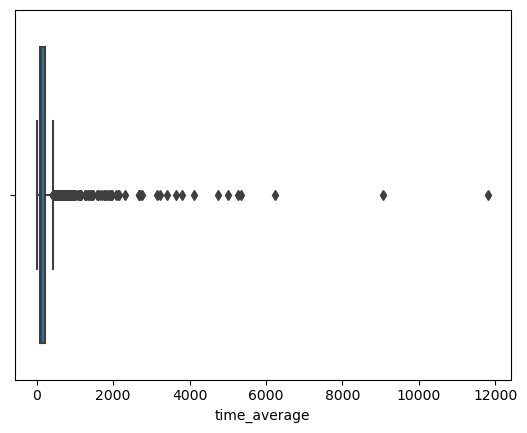

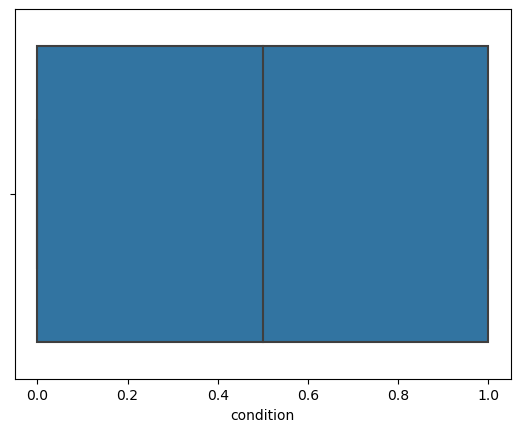

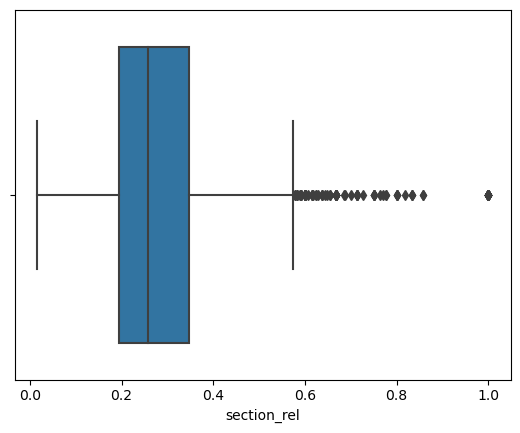

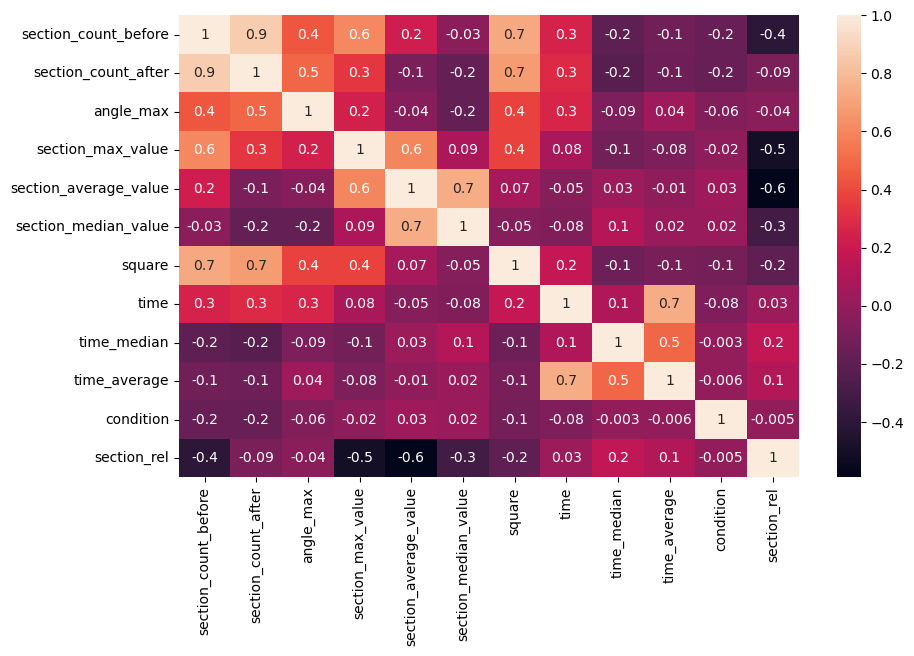

In [12]:
print_hist_boxplot_heatmap(all_data)

In [13]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(1099, 12)

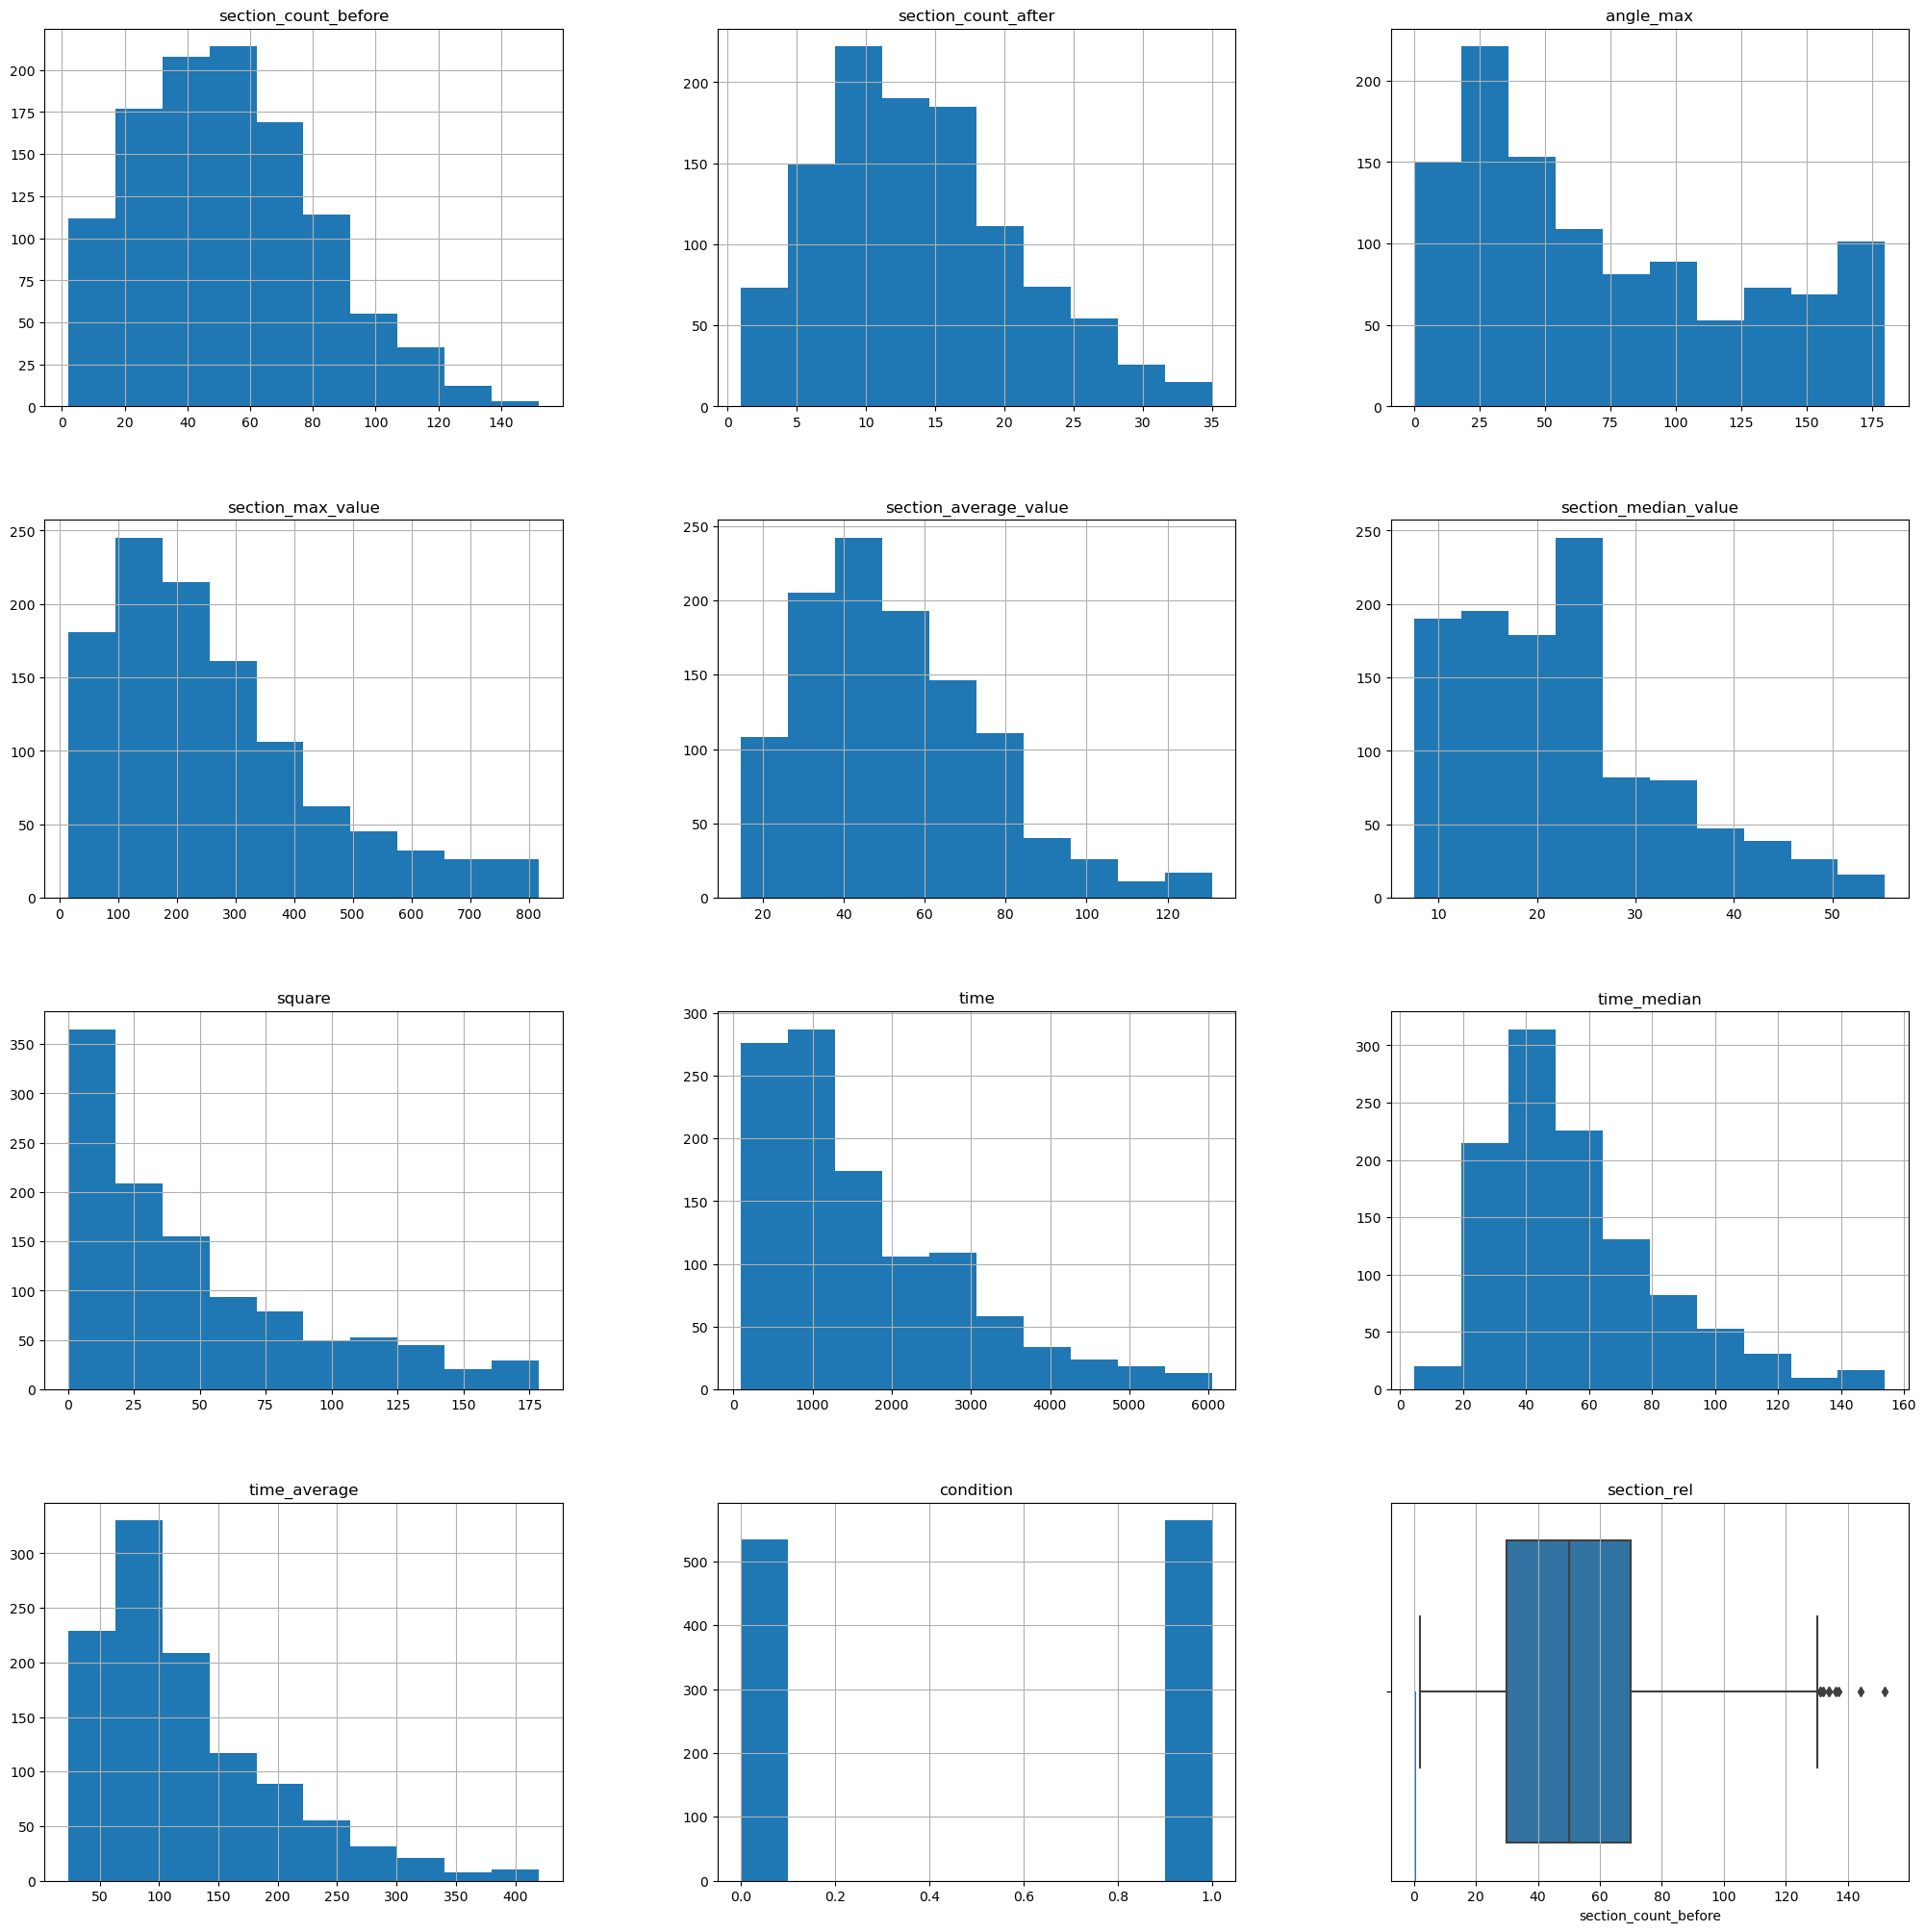

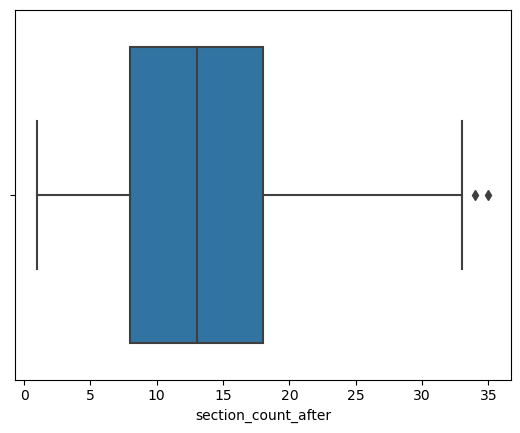

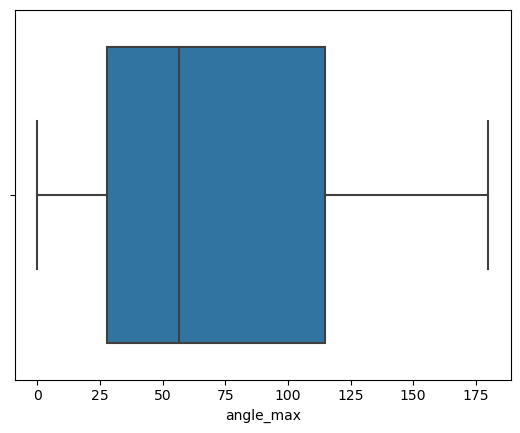

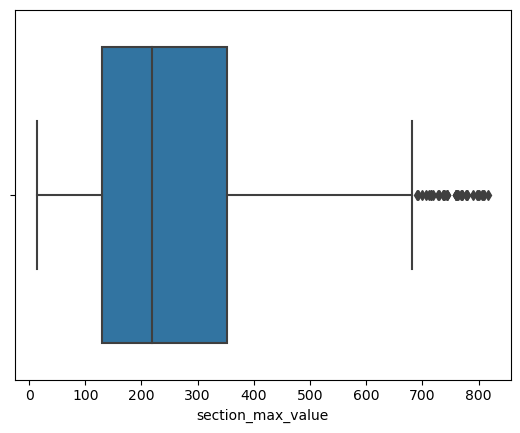

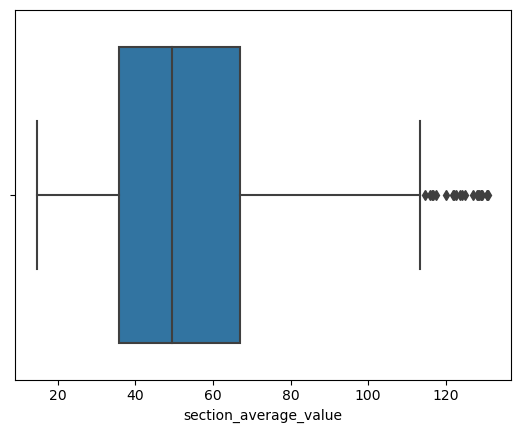

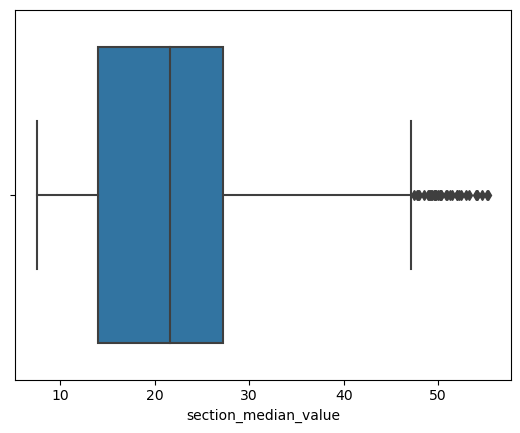

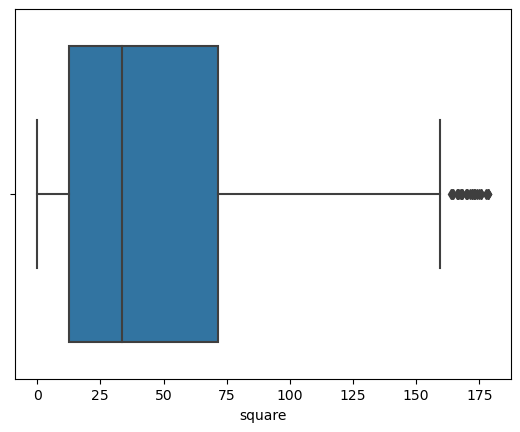

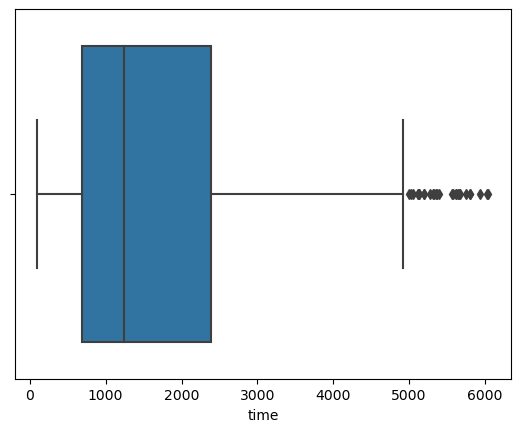

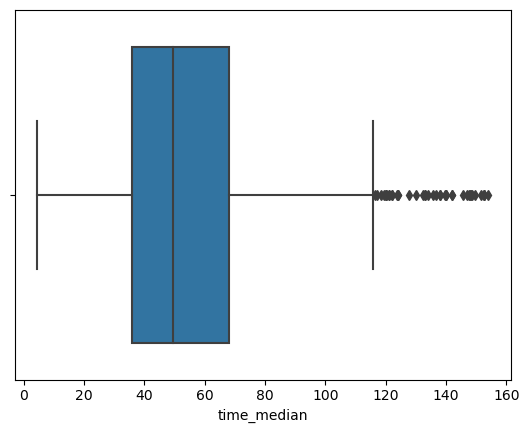

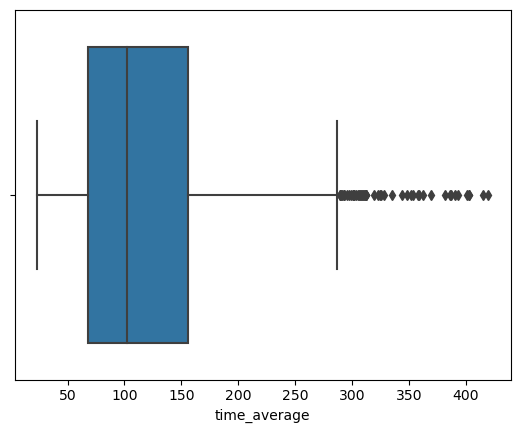

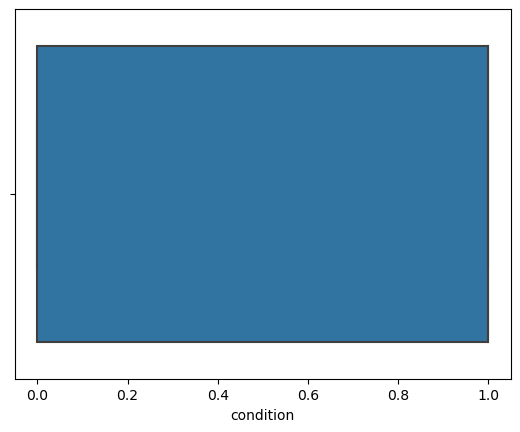

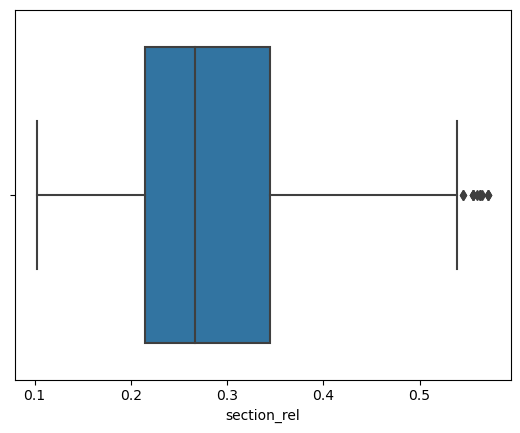

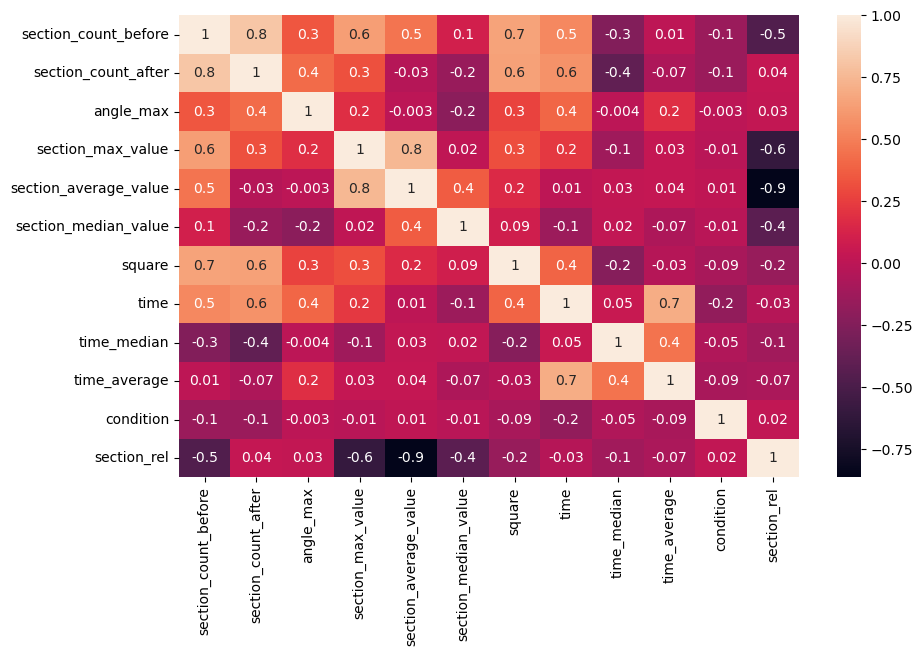

In [14]:
print_hist_boxplot_heatmap(all_data)

In [15]:
from sklearn.preprocessing import StandardScaler
scale_data = all_data.drop("condition", axis=1)
scaled_features = StandardScaler().fit_transform(scale_data.values)
scale_data = pd.DataFrame(scaled_features, index=scale_data.index, columns=scale_data.columns)

all_data = pd.concat([scale_data,all_data["condition"]], axis=1)

In [16]:
#all_data = all_data.drop(['time', 'time_average', 'section_average_value', 'section_max_value'], axis=1)

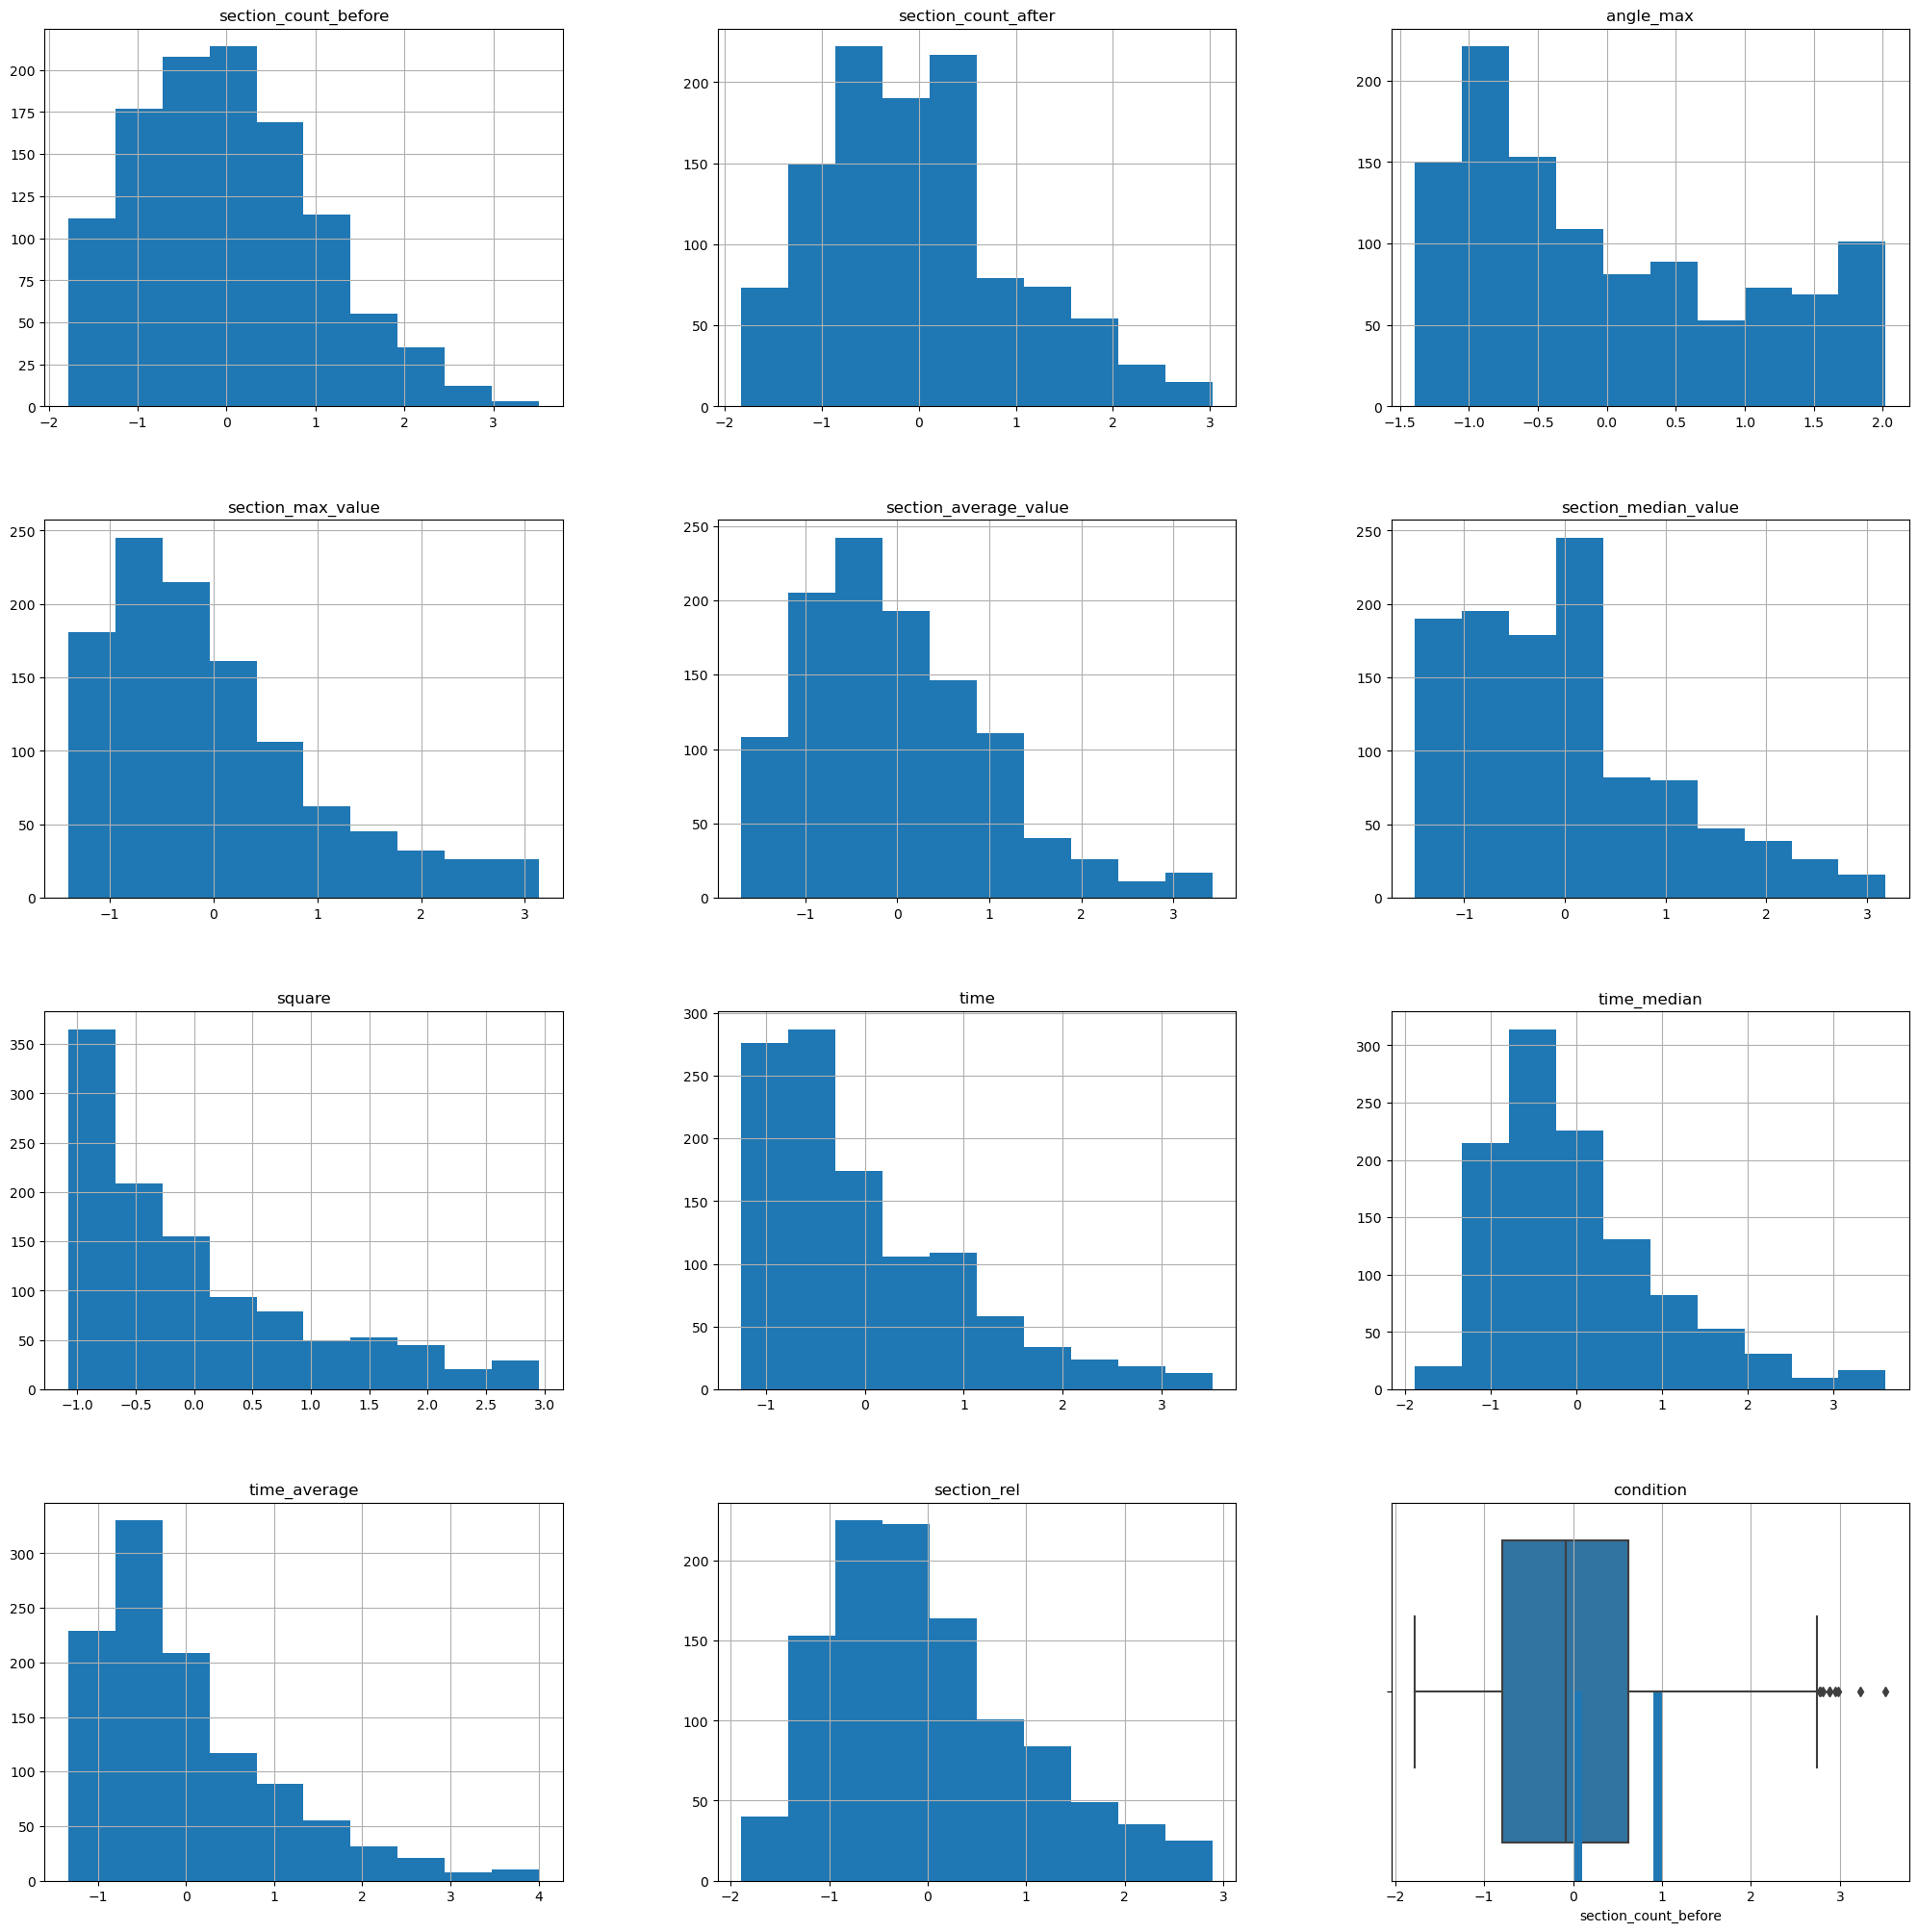

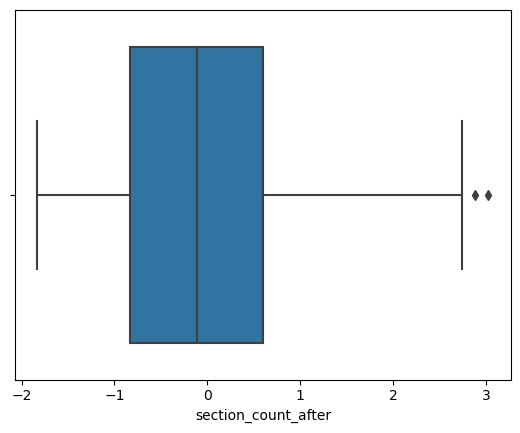

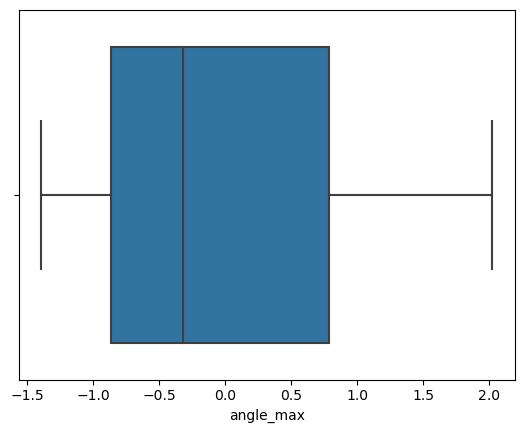

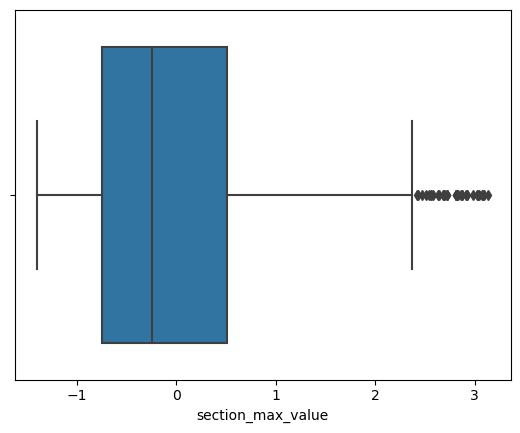

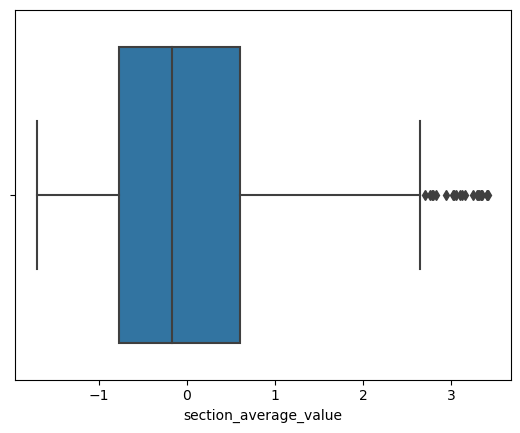

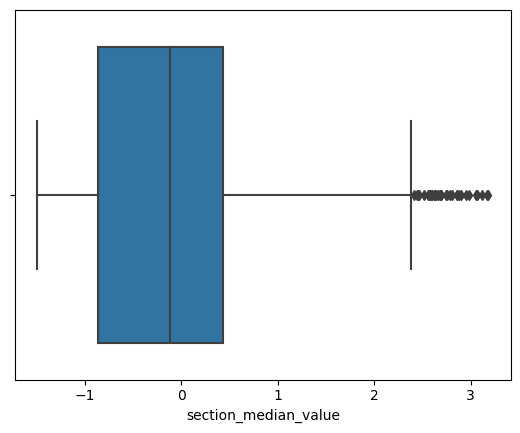

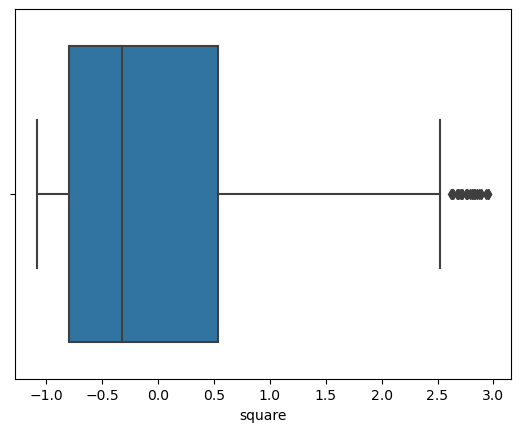

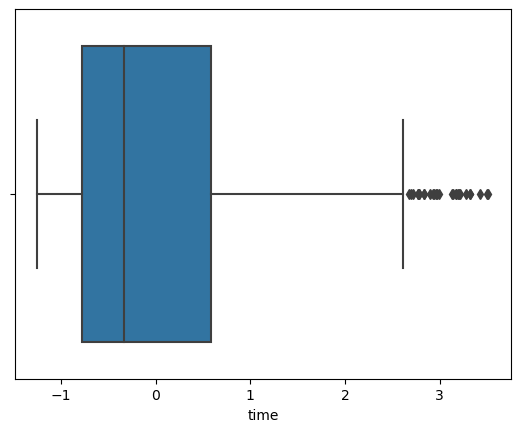

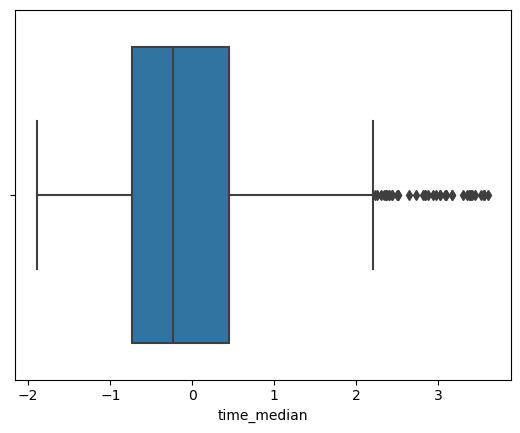

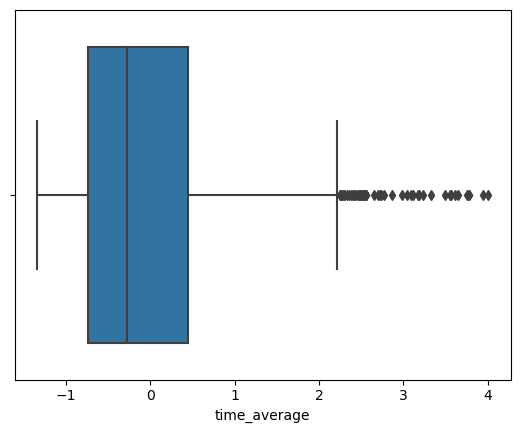

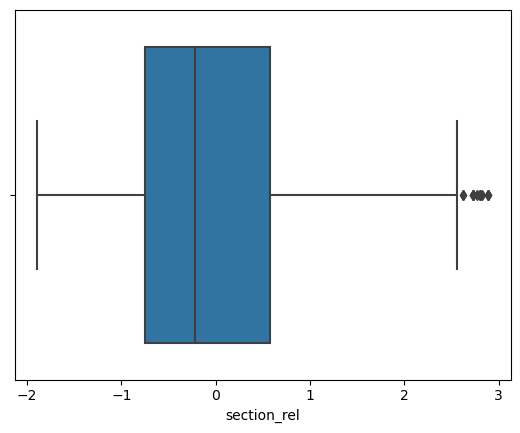

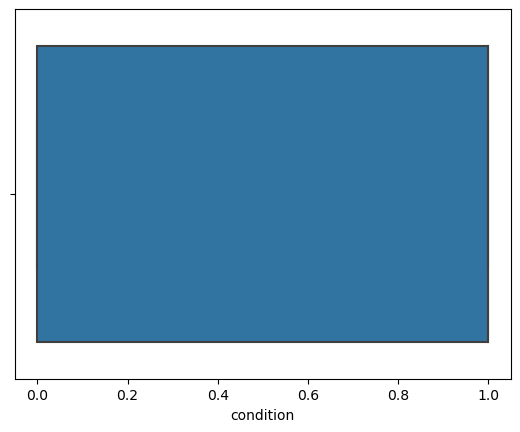

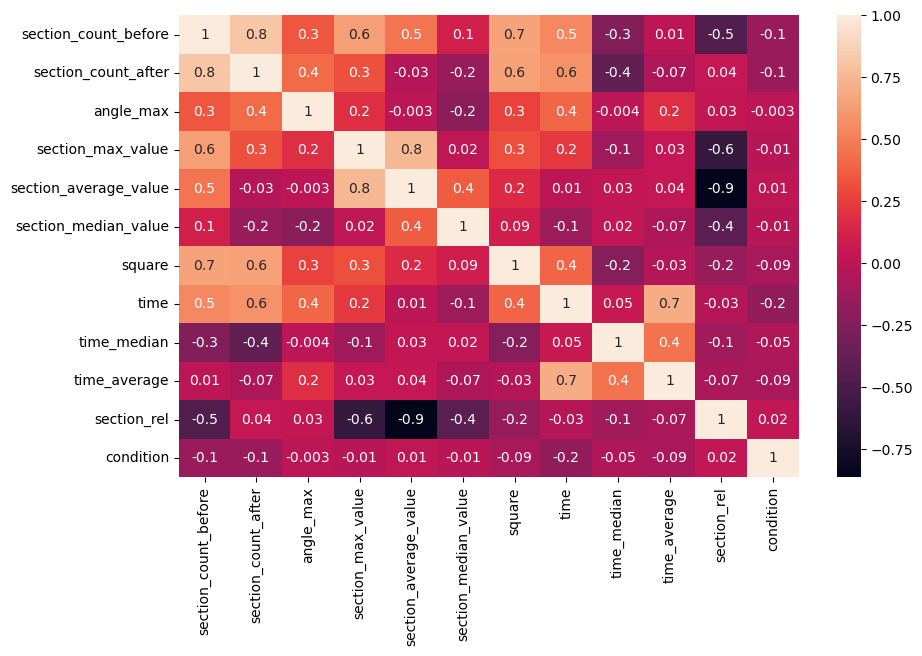

In [17]:
print_hist_boxplot_heatmap(all_data)

In [18]:
import plotly.express as px
from sklearn.decomposition import PCA

X = all_data.drop(["condition"], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig = px.scatter(components, x=0, y=1, color=all_data['condition'])
fig.show()

[0.34075659 0.21993949]


Обучение

In [19]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [20]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
X_train

,section_count_before,section_count_after,angle_max,section_max_value,section_average_value,section_median_value,square,time,time_median,time_average,section_rel
146,0.725677,1.740609,1.618830,-0.503343,-0.766474,-0.397051,1.362755,1.589361,-0.129176,0.235437,0.693267
13,-0.262618,0.455518,1.492492,-0.983682,-0.968641,-1.087154,0.122726,1.399010,1.065823,1.046416,0.913681
1551,2.243417,1.597821,-0.212293,1.552641,0.313973,0.040861,0.651785,0.480457,-0.251774,-0.435529,-0.741054
642,-0.862655,-0.543997,1.420449,-0.586946,-0.801659,-0.059398,-0.040084,-0.596886,0.293640,-0.423373,0.703246
128,-1.109729,-0.543997,0.169159,-1.227049,-1.196197,0.197624,-0.410775,-0.900191,-0.955181,-0.933810,1.917294
...,...,...,...,...,...,...,...,...,...,...,...
1639,-0.686174,-0.829573,-0.816727,-0.392419,0.217116,1.318771,-0.546537,-0.445540,-1.171516,0.202250,-0.466656
307,-0.015544,0.883882,0.890514,1.187067,-0.260532,-0.040458,-0.314381,-0.807290,-1.202016,-1.214909,0.983411
521,1.325714,2.168973,2.011000,-0.146915,-0.207246,-1.082968,0.099792,-0.424954,-1.024452,-1.128792,0.347125
1306,0.160937,-0.401209,0.919171,0.250000,0.548324,-0.464521,0.156247,-0.002077,2.333005,0.374915,-0.970864


In [22]:
y_train

146     0
13      0
1551    0
642     1
128     0
       ..
1639    0
307     0
521     1
1306    1
841     1
Name: condition, Length: 879, dtype: int64

Градиентый бустинг

In [23]:
from xgboost import XGBClassifier

In [24]:
grid_param = {'learning_rate': [0.001, 0.01, 0.1], 
        'min_child_weight': [1, 5],
        'max_depth': [1, 2, 5, 10, 20],
        'n_estimators': [10, 50, 100, 500, 1000]
        }

In [25]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 5, 10, 20],
                         'min_child_weight': [1, 5],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [26]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [27]:
y_pred = best_clf.predict(X_test)

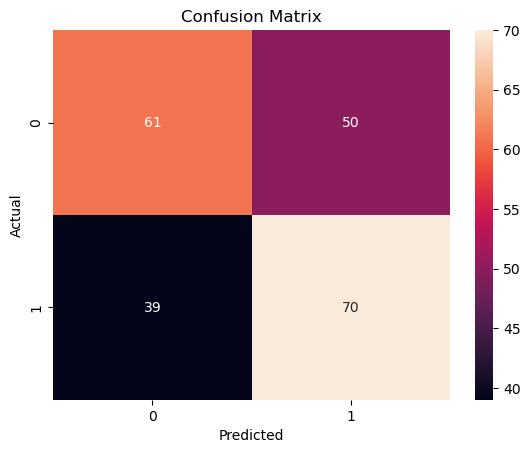

In [28]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [29]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.61      0.55      0.58       111
     class 1       0.58      0.64      0.61       109

    accuracy                           0.60       220
   macro avg       0.60      0.60      0.59       220
weighted avg       0.60      0.60      0.59       220



Случайный лес

In [30]:
grid_param = {
    'n_estimators': [50, 100, 150, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 2)
}

In [31]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 2),
                         'n_estimators': [50, 100, 150, 200, 400]})

In [32]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
y_pred = best_clf.predict(X_test)

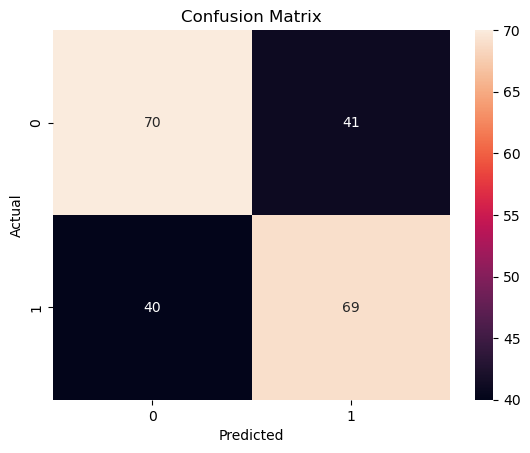

In [34]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [35]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.63      0.63       111
     class 1       0.63      0.63      0.63       109

    accuracy                           0.63       220
   macro avg       0.63      0.63      0.63       220
weighted avg       0.63      0.63      0.63       220



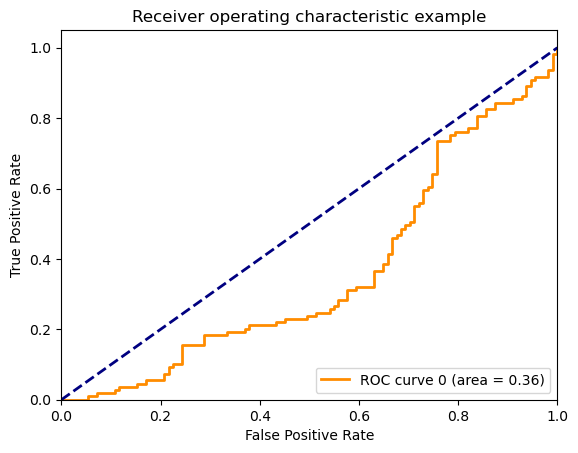

In [36]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

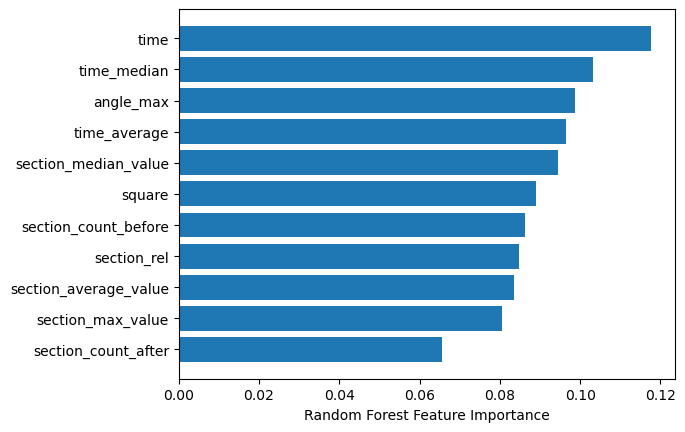

In [37]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [38]:
np.sum(best_clf.feature_importances_)

1.0

KNN

In [39]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [40]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [41]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [42]:
y_pred = best_clf.predict(X_test)

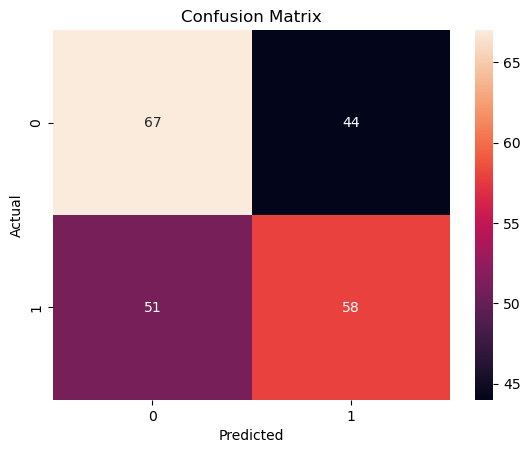

In [43]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [44]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.60      0.59       111
     class 1       0.57      0.53      0.55       109

    accuracy                           0.57       220
   macro avg       0.57      0.57      0.57       220
weighted avg       0.57      0.57      0.57       220



SVM

In [45]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [46]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [47]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [48]:
y_pred = best_clf.predict(X_test)

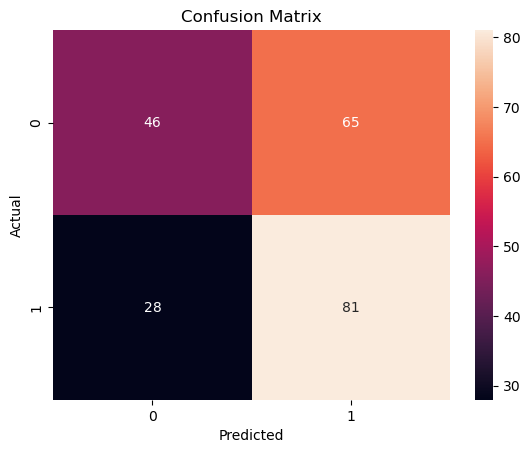

In [49]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [50]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.41      0.50       111
     class 1       0.55      0.74      0.64       109

    accuracy                           0.58       220
   macro avg       0.59      0.58      0.57       220
weighted avg       0.59      0.58      0.57       220

